In [165]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [166]:
linearX = open("linearX.csv","r")
X_list=[]
for line in linearX:
    #print(float(line.split("\n")[0]))    
    X_list.append(float(line.split("\n")[0]))
print(X_list)

linearY = open("linearY.csv","r")
Y_list=[]
for line in linearY:
    #print(float(line.split("\n")[0]))    
    Y_list.append(float(line.split("\n")[0]))
#print(Y_list)

[9.1, 8.0, 9.1, 8.4, 6.9, 7.7, 15.6, 7.3, 7.0, 7.2, 10.1, 11.5, 7.1, 10.0, 8.9, 7.9, 5.6, 6.3, 6.7, 10.4, 8.5, 7.4, 6.3, 5.4, 8.9, 9.4, 7.5, 11.9, 7.8, 7.4, 10.8, 10.2, 6.2, 7.7, 13.7, 8.0, 6.7, 6.7, 7.0, 8.3, 7.4, 9.9, 6.1, 7.0, 5.4, 10.7, 7.6, 8.9, 9.2, 6.6, 7.2, 8.0, 7.8, 7.9, 7.0, 7.0, 7.6, 9.1, 9.0, 7.9, 6.6, 11.9, 6.5, 7.1, 8.8, 7.5, 7.7, 6.0, 10.6, 6.6, 8.2, 7.9, 7.1, 5.6, 6.4, 7.5, 9.8, 7.0, 10.5, 7.1, 6.2, 6.5, 7.7, 7.2, 9.3, 8.5, 7.7, 6.8, 7.8, 8.7, 9.6, 7.2, 9.3, 8.1, 6.6, 7.8, 10.2, 6.1, 7.3, 7.3]


In [167]:
#Normalizing X feature

sum = 0
for i in range(len(X_list)):
    sum+= X_list[i]
mean = sum/len(X_list)    
print(mean)
temp = 0
for i in range(len(X_list)):
    temp+=(X_list[i]-mean)**2
variance = temp/len(X_list)    
print(variance)
std = math.sqrt(variance)
print(std)

for i in range(len(X_list)):
    X_list[i]=(X_list[i] - mean)/std

print(X_list)


8.062000000000001
2.9691559999999995
1.723123907326458
[0.6023942884122158, -0.03598116173560514, 0.6023942884122158, 0.19615536559087549, -0.6743566118834261, -0.21008355723046535, 4.374612857467523, -0.44222008455694595, -0.6163224800518061, -0.5002542163885658, 1.1827356067284167, 1.9952134523710985, -0.5582883482201862, 1.124701474896797, 0.486326024748976, -0.09401529356722503, -1.428800325694488, -1.022561402873147, -0.7904248755466664, 1.3568380022232776, 0.25418949742249536, -0.3841859527253256, -1.022561402873147, -1.5448685893577276, 0.486326024748976, 0.7764966839070765, -0.32615182089370565, 2.227349979697579, -0.15204942539884544, -0.3841859527253256, 1.5889745295497582, 1.2407697385600367, -1.0805955347047669, -0.21008355723046535, 3.2719643526667403, -0.03598116173560514, -0.7904248755466664, -0.7904248755466664, -0.6163224800518061, 0.13812123375925558, -0.3841859527253256, 1.066667343065177, -1.1386296665363873, -0.6163224800518061, -1.5448685893577276, 1.5309403977181

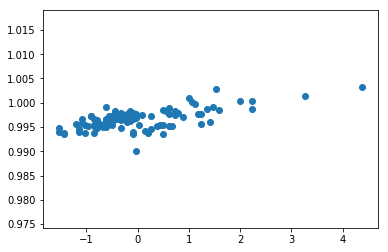

In [168]:
plt.scatter(X_list,Y_list)


In [169]:
x_vec = np.array([X_list])
x_vec = np.transpose(x_vec)
#print(x_vec)
print(x_vec[1])

[-0.03598116]


In [170]:
#Initializing theta and x vector
theta = np.array([[0.,0.]]) 
theta = np.transpose(theta)

x_i = np.array([[1,x_vec[0]]])
x_i = np.transpose(x_i)
print(theta.shape,x_i.shape)

(2, 1) (2, 1)


In [171]:
def hypo_xi(theta,x_vec):
    result = np.dot(theta.T,x_vec)
    #print(result[0][0])
    return result[0][0]

In [172]:
hypo_xi(theta,x_i)

0.0

In [173]:
def grad_J_theta(X_list,Y_list,theta):
    result = np.zeros((2,1))
    for i in range(len(X_list)):
        x_i = np.array([[1,X_list[i]]])
        x_i = np.transpose(x_i)
        result[0] += np.array(  [ (Y_list[i]-  hypo_xi(theta, x_i ))*1   ]  ) # expected real value in square braces
        result[1] += np.array(  [ (Y_list[i]-  hypo_xi(theta, x_i ))*X_list[i]  ]  ) # expected real value in square braces
        
    return result/len(X_list)
    
    
    

In [174]:
grad_J_theta(X_list,Y_list,theta)

array([[ 0.9966201],
       [ 0.0013402]])

In [175]:
def cost(X_list,Y_list,theta):
    result = 0
    for i in range(len(X_list)):
        x_i = np.array([[1,X_list[i]]])
        x_i = np.transpose(x_i)
        result+= (Y_list[i]-  hypo_xi(theta, x_i ))**2
    return result/(2*len(X_list))

In [176]:
cost(X_list,Y_list,theta)

0.49662790471450036

In [177]:

# for i in range(10000):
#     theta += 0.01*grad_J_theta(X_list,Y_list,theta)
    
#     #print(theta)
#     print(cost(X_list,Y_list,theta))
  
learning_rate = 0.01
prev_cost = cost(X_list,Y_list,theta)
theta += learning_rate*grad_J_theta(X_list,Y_list,theta)
curr_cost = cost(X_list,Y_list,theta)

print(curr_cost,prev_cost,curr_cost - prev_cost)
count =0
plot_theta_0=[]
plot_theta_1=[]
plot_cost=[]
while  True:
    if prev_cost - curr_cost < 1e-16:
        break
    
    theta += learning_rate*grad_J_theta(X_list,Y_list,theta)
    count +=1
    #print(theta)
    prev_cost = curr_cost
    curr_cost = cost(X_list,Y_list,theta)
    #print(cost(X_list,Y_list,theta),prev_cost - curr_cost)
    print(theta[0],theta[1],cost(X_list,Y_list,theta))
    plot_theta_0.append(theta[0][0])
    plot_theta_1.append(theta[1][0])
    plot_cost.append(cost(X_list,Y_list,theta))
    
# print(plot_theta_0)
# print(plot_theta_1)
# print(plot_cost)

print(count) 
    
# prev_theta = theta
# theta += 0.01*grad_J_theta(X_list,Y_list,theta)
# print(prev_theta,theta)
# count = 0
# while not(np.allclose(theta,prev_theta,atol=1e-6)):
#     theta += 0.01*grad_J_theta(X_list,Y_list,theta)
#     count +=1
#     print(theta)
#     prev_theta = theta
#     print(cost(X_list,Y_list,theta))
# print(count)    

0.486745033187 0.496627904715 -0.0098828715275
[ 0.01983274] [  2.66699008e-05] 0.477058830803
[ 0.02960061] [  3.98051619e-05] 0.467565383846
[ 0.03927081] [  5.28090705e-05] 0.458260856484
[ 0.0488443] [  6.56829400e-05] 0.449141489216
[ 0.05832206] [  7.84280708e-05] 0.440203597357
[ 0.06770504] [  9.10457503e-05] 0.431443569546
[ 0.07699419] [ 0.00010354] 0.422857866288
[ 0.08619045] [ 0.0001159] 0.414443018526
[ 0.09529475] [ 0.00012815] 0.406195626233
[ 0.104308] [ 0.00014027] 0.398112357048
[ 0.11323112] [ 0.00015227] 0.390189944919
[ 0.12206501] [ 0.00016415] 0.382425188791
[ 0.13081056] [ 0.00017591] 0.37481495131
[ 0.13946866] [ 0.00018755] 0.367356157556
[ 0.14804017] [ 0.00019908] 0.360045793797
[ 0.15652597] [ 0.00021049] 0.352880906276
[ 0.16492691] [ 0.00022178] 0.345858600018
[ 0.17324384] [ 0.00023297] 0.338976037654
[ 0.18147761] [ 0.00024404] 0.332230438281
[ 0.18962903] [ 0.000255] 0.325619076335
[ 0.19769894] [ 0.00026585] 0.319139280493
[ 0.20568815] [ 0.0002766] 

[ 0.86835475] [ 0.00116771] 0.00822720926086
[ 0.86963741] [ 0.00116944] 0.00806351157288
[ 0.87090723] [ 0.00117114] 0.0079030714689
[ 0.87216436] [ 0.00117284] 0.00774582412299
[ 0.87340892] [ 0.00117451] 0.00759170599926
[ 0.87464103] [ 0.00117617] 0.00744065482619
[ 0.87586082] [ 0.00117781] 0.00729260957146
[ 0.87706841] [ 0.00117943] 0.00714751041731
[ 0.87826393] [ 0.00118104] 0.00700529873632
[ 0.87944749] [ 0.00118263] 0.00686591706779
[ 0.88061922] [ 0.0011842] 0.00672930909445
[ 0.88177923] [ 0.00118576] 0.00659541961979
[ 0.88292764] [ 0.00118731] 0.00646419454568
[ 0.88406456] [ 0.00118884] 0.00633558085053
[ 0.88519012] [ 0.00119035] 0.00620952656793
[ 0.88630442] [ 0.00119185] 0.00608598076554
[ 0.88740757] [ 0.00119333] 0.00596489352462
[ 0.8884997] [ 0.0011948] 0.0058462159198
[ 0.8895809] [ 0.00119626] 0.00572989999931
[ 0.89065129] [ 0.0011977] 0.00561589876565
[ 0.89171098] [ 0.00119912] 0.00550416615653
[ 0.89276007] [ 0.00120053] 0.00539465702633
[ 0.89379867] [ 0

[ 0.97799637] [ 0.00131515] 0.000174616791485
[ 0.97818261] [ 0.0013154] 0.000171165693651
[ 0.97836698] [ 0.00131565] 0.000167783272665
[ 0.97854951] [ 0.0013159] 0.000164468161856
[ 0.97873022] [ 0.00131614] 0.000161219021752
[ 0.97890912] [ 0.00131638] 0.000158034539537
[ 0.97908623] [ 0.00131662] 0.000154913428517
[ 0.97926157] [ 0.00131685] 0.000151854427607
[ 0.97943515] [ 0.00131709] 0.000148856300815
[ 0.979607] [ 0.00131732] 0.000145917836746
[ 0.97977713] [ 0.00131755] 0.000143037848112
[ 0.97994556] [ 0.00131777] 0.000140215171252
[ 0.98011231] [ 0.001318] 0.000137448665661
[ 0.98027738] [ 0.00131822] 0.000134737213532
[ 0.98044081] [ 0.00131844] 0.0001320797193
[ 0.9806026] [ 0.00131866] 0.000129475109203
[ 0.98076278] [ 0.00131887] 0.000126922330847
[ 0.98092135] [ 0.00131909] 0.00012442035278
[ 0.98107834] [ 0.0013193] 0.000121968164077
[ 0.98123376] [ 0.00131951] 0.000119564773929
[ 0.98138762] [ 0.00131971] 0.000117209211245
[ 0.98153995] [ 0.00131992] 0.000114900524259

[ 0.99363009] [ 0.00133618] 5.6648670574e-06
[ 0.99365999] [ 0.00133622] 5.5759125202e-06
[ 0.99368959] [ 0.00133626] 5.48872817828e-06
[ 0.9937189] [ 0.00133629] 5.40327880477e-06
[ 0.99374791] [ 0.00133633] 5.3195298738e-06
[ 0.99377663] [ 0.00133637] 5.23744754655e-06
[ 0.99380507] [ 0.00133641] 5.15699865761e-06
[ 0.99383322] [ 0.00133645] 5.07815070156e-06
[ 0.99386109] [ 0.00133649] 5.00087181984e-06
[ 0.99388868] [ 0.00133652] 4.92513078786e-06
[ 0.99391599] [ 0.00133656] 4.85089700242e-06
[ 0.99394303] [ 0.0013366] 4.77814046931e-06
[ 0.9939698] [ 0.00133663] 4.70683179121e-06
[ 0.99399631] [ 0.00133667] 4.63694215581e-06
[ 0.99402254] [ 0.0013367] 4.56844332414e-06
[ 0.99404852] [ 0.00133674] 4.50130761923e-06
[ 0.99407424] [ 0.00133677] 4.43550791485e-06
[ 0.99409969] [ 0.00133681] 4.37101762458e-06
[ 0.9941249] [ 0.00133684] 4.30781069109e-06
[ 0.99414985] [ 0.00133687] 4.24586157558e-06
[ 0.99417455] [ 0.00133691] 4.18514524746e-06
[ 0.99419901] [ 0.00133694] 4.12563717428e

[ 0.99615432] [ 0.00133957] 1.30326665193e-06
[ 0.99615898] [ 0.00133958] 1.3011079628e-06
[ 0.99616359] [ 0.00133958] 1.29899223158e-06
[ 0.99616815] [ 0.00133959] 1.29691860341e-06
[ 0.99617267] [ 0.00133959] 1.29488624044e-06
[ 0.99617715] [ 0.0013396] 1.29289432149e-06
[ 0.99618158] [ 0.00133961] 1.29094204173e-06
[ 0.99618596] [ 0.00133961] 1.28902861234e-06
[ 0.9961903] [ 0.00133962] 1.2871532602e-06
[ 0.9961946] [ 0.00133962] 1.28531522756e-06
[ 0.99619885] [ 0.00133963] 1.28351377177e-06
[ 0.99620307] [ 0.00133964] 1.28174816495e-06
[ 0.99620724] [ 0.00133964] 1.2800176937e-06
[ 0.99621137] [ 0.00133965] 1.27832165884e-06
[ 0.99621545] [ 0.00133965] 1.27665937506e-06
[ 0.9962195] [ 0.00133966] 1.27503017074e-06
[ 0.99622351] [ 0.00133966] 1.27343338758e-06
[ 0.99622747] [ 0.00133967] 1.27186838041e-06
[ 0.9962314] [ 0.00133967] 1.27033451687e-06
[ 0.99623529] [ 0.00133968] 1.26883117723e-06
[ 0.99623913] [ 0.00133968] 1.26735775404e-06
[ 0.99624294] [ 0.00133969] 1.26591365197e

[ 0.99655382] [ 0.00134011] 1.19698662117e-06
[ 0.99655448] [ 0.00134011] 1.19694290464e-06
[ 0.99655513] [ 0.00134011] 1.19690005808e-06
[ 0.99655578] [ 0.00134011] 1.19685806416e-06
[ 0.99655643] [ 0.00134011] 1.19681690593e-06
[ 0.99655706] [ 0.00134011] 1.19677656674e-06
[ 0.99655769] [ 0.00134011] 1.1967370303e-06
[ 0.99655832] [ 0.00134011] 1.19669828063e-06
[ 0.99655894] [ 0.00134011] 1.19666030209e-06
[ 0.99655955] [ 0.00134011] 1.19662307931e-06
[ 0.99656015] [ 0.00134012] 1.19658659727e-06
[ 0.99656075] [ 0.00134012] 1.19655084123e-06
[ 0.99656135] [ 0.00134012] 1.19651579672e-06
[ 0.99656193] [ 0.00134012] 1.19648144961e-06
[ 0.99656252] [ 0.00134012] 1.196447786e-06
[ 0.99656309] [ 0.00134012] 1.1964147923e-06
[ 0.99656366] [ 0.00134012] 1.19638245517e-06
[ 0.99656423] [ 0.00134012] 1.19635076155e-06
[ 0.99656478] [ 0.00134012] 1.19631969863e-06
[ 0.99656534] [ 0.00134012] 1.19628925387e-06
[ 0.99656589] [ 0.00134012] 1.19625941496e-06
[ 0.99656643] [ 0.00134012] 1.19623016

[ 0.99660967] [ 0.00134018] 1.19484420413e-06
[ 0.99660977] [ 0.00134018] 1.1948431217e-06
[ 0.99660988] [ 0.00134018] 1.19484206082e-06
[ 0.99660998] [ 0.00134018] 1.19484102105e-06
[ 0.99661008] [ 0.00134018] 1.19484000197e-06
[ 0.99661018] [ 0.00134018] 1.19483900317e-06
[ 0.99661028] [ 0.00134018] 1.19483802424e-06
[ 0.99661038] [ 0.00134018] 1.1948370648e-06
[ 0.99661048] [ 0.00134018] 1.19483612445e-06
[ 0.99661057] [ 0.00134018] 1.19483520281e-06
[ 0.99661067] [ 0.00134018] 1.19483429951e-06
[ 0.99661076] [ 0.00134018] 1.19483341419e-06
[ 0.99661085] [ 0.00134018] 1.19483254649e-06
[ 0.99661095] [ 0.00134018] 1.19483169605e-06
[ 0.99661104] [ 0.00134018] 1.19483086254e-06
[ 0.99661113] [ 0.00134018] 1.19483004561e-06
[ 0.99661122] [ 0.00134018] 1.19482924494e-06
[ 0.99661131] [ 0.00134018] 1.19482846021e-06
[ 0.9966114] [ 0.00134018] 1.19482769109e-06
[ 0.99661148] [ 0.00134018] 1.19482693727e-06
[ 0.99661157] [ 0.00134018] 1.19482619846e-06
[ 0.99661165] [ 0.00134018] 1.1948254

[ 0.99661841] [ 0.00134019] 1.19479124147e-06
[ 0.99661843] [ 0.00134019] 1.19479121301e-06
[ 0.99661844] [ 0.00134019] 1.19479118511e-06
[ 0.99661846] [ 0.00134019] 1.19479115776e-06
[ 0.99661848] [ 0.00134019] 1.19479113096e-06
[ 0.99661849] [ 0.00134019] 1.19479110469e-06
[ 0.99661851] [ 0.00134019] 1.19479107895e-06
[ 0.99661852] [ 0.00134019] 1.19479105372e-06
[ 0.99661854] [ 0.00134019] 1.19479102898e-06
[ 0.99661855] [ 0.00134019] 1.19479100475e-06
[ 0.99661857] [ 0.00134019] 1.19479098099e-06
[ 0.99661859] [ 0.00134019] 1.19479095771e-06
[ 0.9966186] [ 0.00134019] 1.19479093489e-06
[ 0.99661862] [ 0.00134019] 1.19479091252e-06
[ 0.99661863] [ 0.00134019] 1.1947908906e-06
[ 0.99661865] [ 0.00134019] 1.19479086912e-06
[ 0.99661866] [ 0.00134019] 1.19479084806e-06
[ 0.99661867] [ 0.00134019] 1.19479082742e-06
[ 0.99661869] [ 0.00134019] 1.1947908072e-06
[ 0.9966187] [ 0.00134019] 1.19479078737e-06
[ 0.99661872] [ 0.00134019] 1.19479076794e-06
[ 0.99661873] [ 0.00134019] 1.19479074

[ 0.99661986] [ 0.0013402] 1.19478984054e-06
[ 0.99661986] [ 0.0013402] 1.19478983995e-06
[ 0.99661986] [ 0.0013402] 1.19478983938e-06
[ 0.99661986] [ 0.0013402] 1.19478983881e-06
[ 0.99661987] [ 0.0013402] 1.19478983826e-06
[ 0.99661987] [ 0.0013402] 1.19478983772e-06
[ 0.99661987] [ 0.0013402] 1.19478983718e-06
[ 0.99661987] [ 0.0013402] 1.19478983666e-06
[ 0.99661988] [ 0.0013402] 1.19478983615e-06
[ 0.99661988] [ 0.0013402] 1.19478983565e-06
[ 0.99661988] [ 0.0013402] 1.19478983516e-06
[ 0.99661988] [ 0.0013402] 1.19478983468e-06
[ 0.99661988] [ 0.0013402] 1.19478983421e-06
[ 0.99661989] [ 0.0013402] 1.19478983374e-06
[ 0.99661989] [ 0.0013402] 1.19478983329e-06
[ 0.99661989] [ 0.0013402] 1.19478983285e-06
[ 0.99661989] [ 0.0013402] 1.19478983241e-06
[ 0.9966199] [ 0.0013402] 1.19478983199e-06
[ 0.9966199] [ 0.0013402] 1.19478983157e-06
[ 0.9966199] [ 0.0013402] 1.19478983116e-06
[ 0.9966199] [ 0.0013402] 1.19478983076e-06
[ 0.9966199] [ 0.0013402] 1.19478983036e-06
[ 0.99661991] [

In [178]:
print(theta)

[[ 0.99662  ]
 [ 0.0013402]]


[0.6023942884122158, -0.03598116173560514, 0.6023942884122158, 0.19615536559087549, -0.6743566118834261, -0.21008355723046535, 4.374612857467523, -0.44222008455694595, -0.6163224800518061, -0.5002542163885658, 1.1827356067284167, 1.9952134523710985, -0.5582883482201862, 1.124701474896797, 0.486326024748976, -0.09401529356722503, -1.428800325694488, -1.022561402873147, -0.7904248755466664, 1.3568380022232776, 0.25418949742249536, -0.3841859527253256, -1.022561402873147, -1.5448685893577276, 0.486326024748976, 0.7764966839070765, -0.32615182089370565, 2.227349979697579, -0.15204942539884544, -0.3841859527253256, 1.5889745295497582, 1.2407697385600367, -1.0805955347047669, -0.21008355723046535, 3.2719643526667403, -0.03598116173560514, -0.7904248755466664, -0.7904248755466664, -0.6163224800518061, 0.13812123375925558, -0.3841859527253256, 1.066667343065177, -1.1386296665363873, -0.6163224800518061, -1.5448685893577276, 1.5309403977181373, -0.2681176890620858, 0.486326024748976, 0.66042842

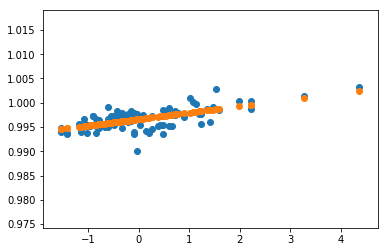

In [179]:
# linearX = open("linearX.csv","r")
# X_list=[]
# for line in linearX:
#     #print(float(line.split("\n")[0]))    
#     X_list.append(float(line.split("\n")[0]))

print(X_list)
x_0 = np.array([[1,X_list[0]]])
x_0 = np.transpose(x_0)
x_1 = np.array([[1,X_list[1]]])
x_1 = np.transpose(x_1)
x1 , y1 = X_list[0], hypo_xi(theta,x_0)
x2 , y2 = X_list[1], hypo_xi(theta,x_1)

hypo_xi(theta,x_i)



x1, y1 = [X_list[0], X_list[1]], [hypo_xi(theta,x_0), hypo_xi(theta,x_1)]
#plt.plot(x1,y1)

prediction =[]
for x in X_list:
    x_i = np.array([[1,x]])
    x_i = np.transpose(x_i)
    prediction.append(hypo_xi(theta,x_i))
print(cost(X_list,Y_list,theta))
print(Y_list)
print(prediction)
                      
                      
#axes = plt.gca()

#axes.set_ylim([0.990,1.003])                     
plt.scatter(X_list,Y_list)
plt.scatter(X_list,prediction)

In [180]:
print(theta)

[[ 0.99662  ]
 [ 0.0013402]]


(30,)
(30, 30)


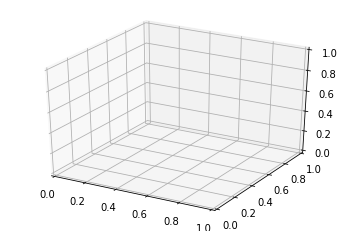

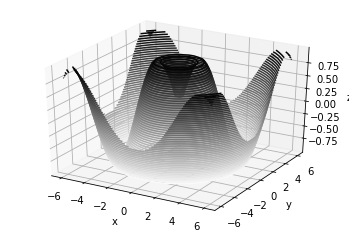

In [186]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
print(x.shape)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)

Z = f(X, Y)
print(Z.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

(1604, 1604)


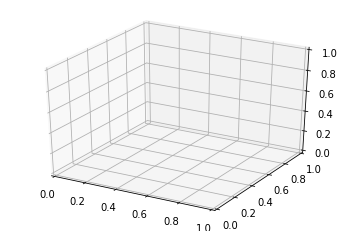

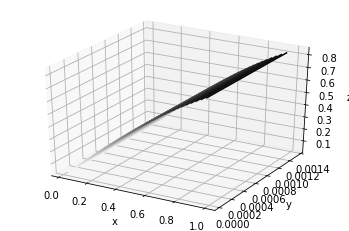

In [187]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')


def cost(X_list,Y_list,theta):
    result = 0
    for i in range(len(X_list)):
        x_i = np.array([[1,X_list[i]]])
        x_i = np.transpose(x_i)
        result+= (Y_list[i]-  hypo_xi(theta, x_i ))**2
    return result/(2*len(X_list))

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = plot_theta_0
y = plot_theta_1

X, Y = np.meshgrid(x, y)

Z = f(X, Y)
print(Z.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

TypeError: Input z must be a 2D array.

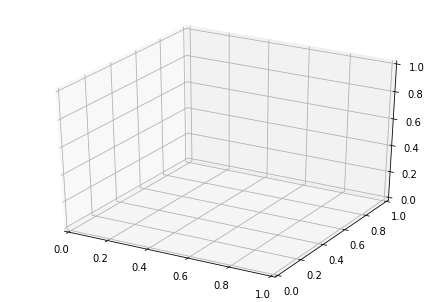

In [183]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
fig = plt.figure()

ax = Axes3D(fig) #<-- Note the difference from your original code...

#X, Y, Z = axes3d.get_test_data(0.05)
X, Y, Z = plot_theta_0 , plot_theta_1 , plot_cost

cset = ax.contour(X, Y, Z, 16, extend3d=True)
ax.clabel(cset, fontsize=9, inline=1)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
fig = plt.figure()

ax = Axes3D(fig) #<-- Note the difference from your original code...

X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contour(X, Y, Z, 16, extend3d=True)
ax.clabel(cset, fontsize=9, inline=1)
plt.show()